In [1]:
# Load library
import numpy as np   # an essential python module
import os
import pandas as pd   # for importing & transforming data
import re   # for regular expressions
import matplotlib.pyplot as plt   # for wordclouds & charts
import seaborn as sns   # for charts
sns.set_style("whitegrid");   # chart background style
plt.rcParams['figure.dpi'] = 360   # for high res chart output
from wordcloud import WordCloud   # for the wordcloud :)
from collections import Counter   # for getting freq of words

In [2]:
os.getcwd()

'C:\\Users\\vivek\\Desktop\\Vivek-Upadhya.github.io'

In [3]:
imdb_review=pd.read_csv("E:\\data science\\IMDB Dataset.csv")

In [4]:
imdb_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [32]:
imdb_review.shape

(50000, 2)

In [33]:
# Change the Dataatype

imdb_review['review']=imdb_review['review'].astype('str')

In [34]:
imdb_review.dtypes

review       object
sentiment    object
dtype: object

# Data preprocessing and cleaning

In [35]:
# 1.Chage into the lower

imdb_review['review']=imdb_review['review'].str.lower()
imdb_review['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production. <br /><br />the...
2    i thought this was a wonderful way to spend ti...
3    basically there's a family where a little boy ...
4    petter mattei's "love in the time of money" is...
Name: review, dtype: object

In [36]:
# 2. Remove white space

imdb_review['review']=imdb_review['review'].str.strip()

In [37]:
# 3. Remove punctuation

import string

def remove_punctuation(text):
    no_punct="".join([c for c in text if c not in string.punctuation])
    return no_punct

In [38]:
imdb_review['review']=imdb_review['review'].apply(lambda x: remove_punctuation(x))
imdb_review['review'].head()

0    one of the other reviewers has mentioned that ...
1    a wonderful little production br br the filmin...
2    i thought this was a wonderful way to spend ti...
3    basically theres a family where a little boy j...
4    petter matteis love in the time of money is a ...
Name: review, dtype: object

In [39]:
# 4. tekeninization

from nltk.tokenize import RegexpTokenizer

token=RegexpTokenizer(r'[\w]+')

In [40]:
imdb_review['review']=imdb_review['review'].map(token.tokenize)

In [18]:
imdb_review['review'].head()

0    [one, of, the, other, reviewers, has, mentione...
1    [a, wonderful, little, production, br, br, the...
2    [i, thought, this, was, a, wonderful, way, to,...
3    [basically, theres, a, family, where, a, littl...
4    [petter, matteis, love, in, the, time, of, mon...
Name: review, dtype: object

In [41]:
# 5. Stemming 

from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [42]:
for i in ENGLISH_STOP_WORDS:
    if i in imdb_review['review']:
              imdb_review['review'].str.remove(i)

In [43]:
# 6. lemmatizer

from nltk.stem import WordNetLemmatizer

In [44]:
lemma=WordNetLemmatizer()

def word_lemmatize(text):
    lem_text=[lemma.lemmatize(i) for i in text]
    return lem_text

In [45]:
imdb_review['review'].apply(lambda x: word_lemmatize(x))

0        [one, of, the, other, reviewer, ha, mentioned,...
1        [a, wonderful, little, production, br, br, the...
2        [i, thought, this, wa, a, wonderful, way, to, ...
3        [basically, there, a, family, where, a, little...
4        [petter, matteis, love, in, the, time, of, mon...
                               ...                        
49995    [i, thought, this, movie, did, a, down, right,...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [i, am, a, catholic, taught, in, parochial, el...
49998    [im, going, to, have, to, disagree, with, the,...
49999    [no, one, expects, the, star, trek, movie, to,...
Name: review, Length: 50000, dtype: object

In [46]:
# 7. Stemmer

from nltk.stem.porter import PorterStemmer 

stem=PorterStemmer()

In [47]:
def word_stemmer(text):
    stem_text=" ".join([stem.stem(i) for i in text])
    return stem_text

In [48]:
imdb_review['review']=imdb_review['review'].apply(lambda x: word_stemmer(x))

In [49]:
imdb_review['review'].head()

0    one of the other review ha mention that after ...
1    a wonder littl product br br the film techniqu...
2    i thought thi wa a wonder way to spend time on...
3    basic there a famili where a littl boy jake th...
4    petter mattei love in the time of money is a v...
Name: review, dtype: object

In [5]:
# create a single string containing all the review, 
# as this will be needed to be able to create a wordcloud
review_string = " ".join(rev for rev in imdb_review['review'])

In [6]:
# view the first 200 elements of the string to check 
# this worked as expected
review_string[0:500]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ"

In [7]:
# create the wordcloud
review_wordcloud = WordCloud(background_color="white",max_words=100).generate(review_string)


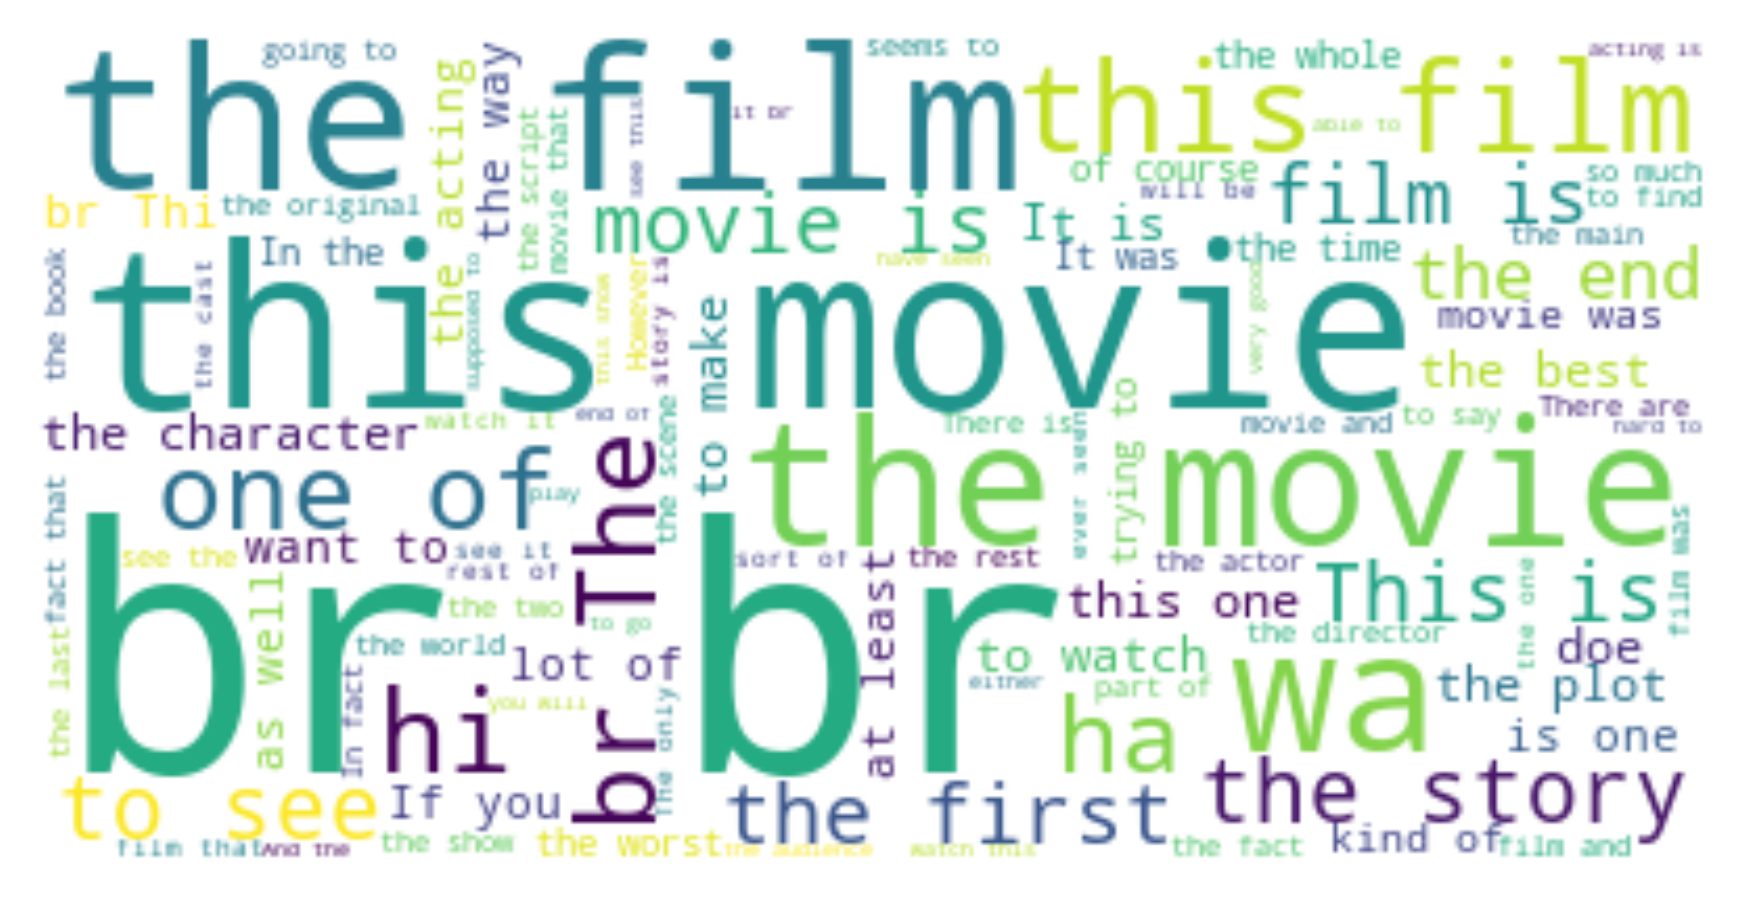

In [8]:
# view the wordcloud
plt.imshow(review_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
# Classify the data set to review and label

x=imdb_review.iloc[:,0]
y=imdb_review.iloc[:,1]

In [55]:
x

0        one of the other review ha mention that after ...
1        a wonder littl product br br the film techniqu...
2        i thought thi wa a wonder way to spend time on...
3        basic there a famili where a littl boy jake th...
4        petter mattei love in the time of money is a v...
                               ...                        
49995    i thought thi movi did a down right good job i...
49996    bad plot bad dialogu bad act idiot direct the ...
49997    i am a cathol taught in parochi elementari sch...
49998    im go to have to disagre with the previou comm...
49999    no one expect the star trek movi to be high ar...
Name: review, Length: 50000, dtype: object

In [56]:
y

0        positive
1        positive
2        positive
3        negative
4        positive
           ...   
49995    positive
49996    negative
49997    negative
49998    negative
49999    negative
Name: sentiment, Length: 50000, dtype: object

In [50]:
# Vectorizer of the Data

from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
tfidf=TfidfVectorizer()

In [57]:
matrix=tfidf.fit_transform(x)

In [58]:
matrix.toarray

<bound method _cs_matrix.toarray of <50000x141982 sparse matrix of type '<class 'numpy.float64'>'
	with 6611691 stored elements in Compressed Sparse Row format>>

In [59]:
# Divide the data set into the train and test
from sklearn.model_selection import train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(matrix,y,train_size=0.8,shuffle=True)

In [61]:
# Load model library

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [71]:
from sklearn.metrics import accuracy_score

# Model building and checking two model for better model selcetion

In [70]:
# building the Naive Baise model

nb=MultinomialNB()
model=nb.fit(x_train,y_train)

In [73]:
# Predict the model
pred=nb.predict(x_test)

In [83]:
Accuracy=accuracy_score(pred,y_test)
print("Accuracy of the model:",Accuracy)

Accuracy of the model: 0.8612


In [86]:
# Building the Decision tree

dc=DecisionTreeClassifier()
model=dc.fit(x_train,y_train)

In [87]:
# Predict the model
pred=dc.predict(x_test)

In [88]:
Accuracy=accuracy_score(pred,y_test)
print("Accuracy of the model:",Accuracy)

Accuracy of the model: 0.7227


In [ ]:
# Naive based model is better so we have select Naive based model